## DCS Compliance Metrics Visualizations

#### By Ritwika Pal

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
from forex_python.converter import CurrencyRates
from collections import defaultdict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("DCSMetricsData.csv")

In [3]:
data

,Date,Current,PendingReview,PendingUpdates,Unverified,GrandTotal,CompPercent
0,6/9/2021 4:00:00 AM,1080,278,109,293,1760,61.36
1,6/10/2021 4:00:00 AM,1081,273,109,292,1755,61.60
2,6/11/2021 4:00:00 AM,1085,268,110,292,1755,61.82
3,6/12/2021 4:00:00 AM,1085,267,110,293,1755,61.82
4,6/13/2021 4:00:00 AM,1085,267,110,293,1755,61.82
5,6/14/2021 4:00:00 AM,1080,280,101,291,1752,61.64
6,6/15/2021 4:00:00 AM,1068,288,102,286,1744,61.24


### Weekly Reports

In [4]:
data["Date"] = data["Date"].map(lambda x : x.split(" ")[0])


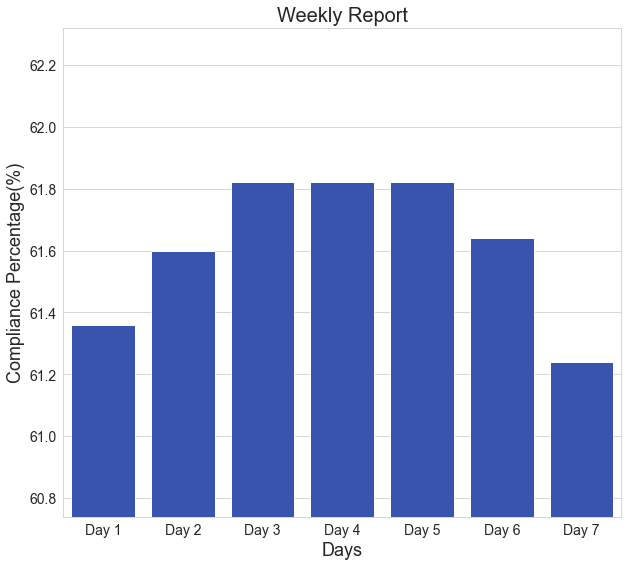

In [12]:
min_limit = min(data['CompPercent']) - 0.5
max_limit = max(data['CompPercent']) + 0.5

sns.set_style("whitegrid")
fig,ax=plt.subplots(figsize=(10,9))
g =sns.barplot(data['Date'],data['CompPercent'], color="#264ABF")
g.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])
plt.ylim(min_limit,max_limit)
plt.xlabel("Days",  fontsize=18)
plt.ylabel("Compliance Percentage(%)",  fontsize=18)
plt.title("Weekly Report",  fontsize=20)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
fig.savefig("Weekly_Reports.jpg", dpi = 300)
plt.show()

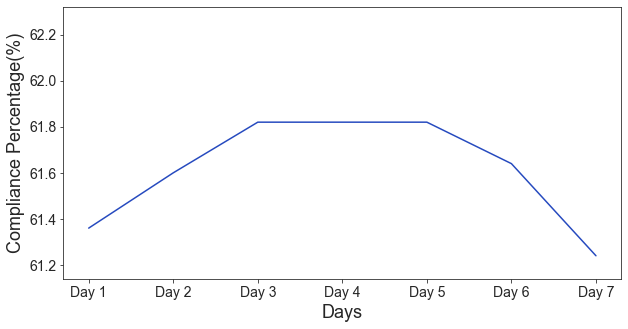

In [55]:
sns.set_style("ticks")
min_limit = min(data['CompPercent']) - 0.1
max_limit = max(data['CompPercent']) + 0.5
fig,ax=plt.subplots(figsize=(10,5))
g = sns.lineplot(x = 'Date',y = 'CompPercent',data=data ,color="#264ABF",  markers= ["o"],dashes = True)
g.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])
plt.xlabel("Days",  fontsize=18)
plt.ylabel("Compliance Percentage(%)",  fontsize=18)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.ylim(min_limit,max_limit)
fig.savefig("Weekly_Reports_lineplot_short.jpg", dpi = 300)
plt.show()

### Daily Reports

In [14]:
daily_data = data.iloc[0, 1:5].tolist()
columns = data.columns[1:5].tolist()
s = columns[1].split("g")
columns[1] = s[0]+'g '+s[1]
s = columns[2].split("g")
columns[2] = s[0]+'g '+s[1]
display(columns)

['Current', 'Pending Review', 'Pending Updates', 'Unverified']

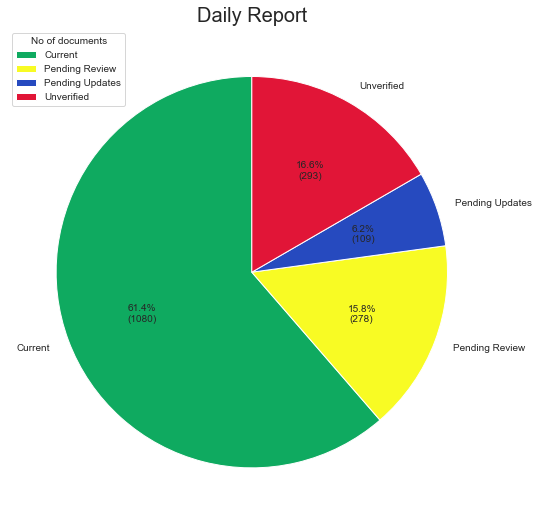

In [15]:
def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)
colors = ["#0FAA60","#F8FB24", "#264ABF", "#E11537",]
fig,ax=plt.subplots(figsize=(10,9))
plt.pie(daily_data, labels = columns, startangle = 90,autopct = lambda pct: func(pct, daily_data), colors=colors)
plt.legend(title="No of documents")
plt.title("Daily Report", fontsize=20)
SMALL_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

fig.savefig("Daily_Reports.jpg", dpi = 300)
plt.show()

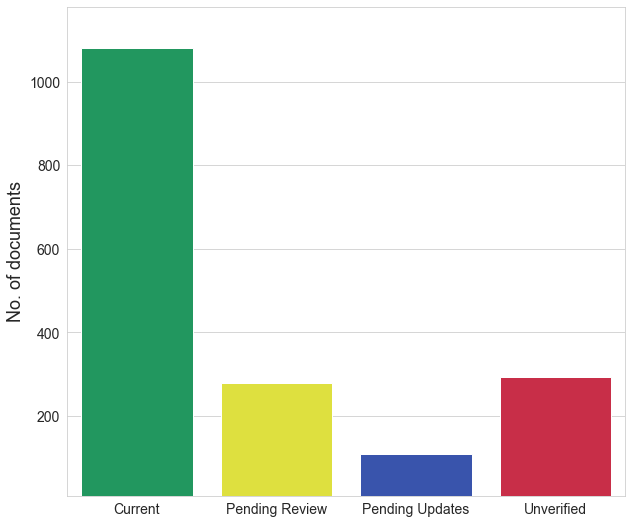

In [28]:
min_limit = min(daily_data) - 100
max_limit = max(daily_data) + 100
colors = ["#0FAA60","#F8FB24", "#264ABF", "#E11537"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")
fig,ax=plt.subplots(figsize=(10,9))
g =sns.barplot(columns,daily_data)
g.set_xticklabels(columns)
plt.ylim(min_limit,max_limit)
plt.ylabel("No. of documents",  fontsize=18)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
fig.savefig("Daily_Reports_barplot.jpg", dpi = 300)
plt.show()

In [17]:
data_scaled = data.copy()
data_scaled['Current'] = (data_scaled['Current']/data_scaled['GrandTotal'])*100
data_scaled['PendingReview'] = (data_scaled['PendingReview']/data_scaled['GrandTotal'])*100
data_scaled['PendingUpdates'] = (data_scaled['PendingUpdates']/data_scaled['GrandTotal'])*100
data_scaled['Unverified'] = (data_scaled['Unverified']/data_scaled['GrandTotal'])*100


In [18]:
data_scaled

,Date,Current,PendingReview,PendingUpdates,Unverified,GrandTotal,CompPercent
0,6/9/2021,61.363636,15.795455,6.193182,16.647727,1760,61.36
1,6/10/2021,61.595442,15.555556,6.210826,16.638177,1755,61.60
2,6/11/2021,61.823362,15.270655,6.267806,16.638177,1755,61.82
3,6/12/2021,61.823362,15.213675,6.267806,16.695157,1755,61.82
4,6/13/2021,61.823362,15.213675,6.267806,16.695157,1755,61.82
5,6/14/2021,61.643836,15.981735,5.764840,16.609589,1752,61.64
6,6/15/2021,61.238532,16.513761,5.848624,16.399083,1744,61.24


In [20]:
# create a scaler object
scaler = MinMaxScaler().fit(data_scaled[['Current', 'PendingReview', 'PendingUpdates', 'Unverified']])
data_scaled = scaler.transform(data_scaled[['Current', 'PendingReview', 'PendingUpdates', 'Unverified']])

#(value - min)/max

In [21]:
data_scaled

array([[0.21391569, 0.44749287, 0.85163125, 0.83980558],
       [0.61027933, 0.26296743, 0.88671193, 0.807548  ],
       [1.        , 0.04382791, 1.        , 0.807548  ],
       [1.        , 0.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        ],
       [0.69302824, 0.59077615, 0.        , 0.71099246],
       [0.        , 1.        , 0.16657917, 0.        ]])

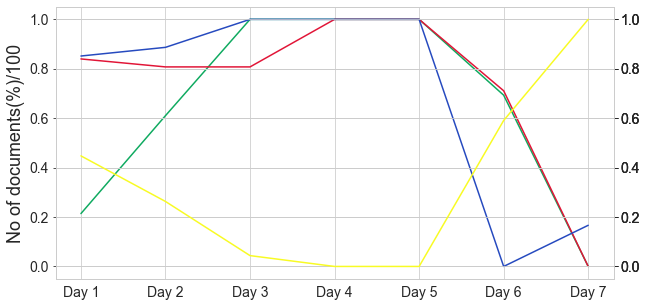

In [58]:
sns.set_style("whitegrid")
fig,ax=plt.subplots(figsize=(10,5))

ax.plot(data['Date'],data_scaled[:,0],color="#0FAA60")
ax.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])
plt.ylabel("No of documents(%)/100",  fontsize=18)
ax2 = ax.twinx()
ax2.plot(data['Date'],data_scaled[:,3],color="#E11537")
ax2.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])

ax3 = ax.twinx()
ax3.plot(data['Date'],data_scaled[:,2],color="#264ABF")
ax3.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])

ax4 = ax.twinx()
ax4.plot(data['Date'],data_scaled[:,1],color="#F8FB24")
ax4.set_xticklabels(['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6', 'Day 7'])


plt.xlabel("Days",  fontsize=18)

plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
fig.savefig("OnePlot.jpg", dpi = 300)
plt.show()
